<a href="https://colab.research.google.com/github/daniloefl/quantumMC/blob/master/QC_Introduction_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install requirements

In [1]:
!pip install qiskit
!pip install pylatexenc

from IPython.display import clear_output
clear_output()

In [2]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': None,
 'qiskit-aer': '0.7.0',
 'qiskit-aqua': '0.8.0',
 'qiskit-ibmq-provider': '0.11.0',
 'qiskit-ignis': '0.5.0',
 'qiskit-terra': '0.16.0'}

# 1.EXAMPLE -  Hadamard Gate

The Hadamard Gate takes as input one single qubit. The output state will have equal probabilities to become 1 or 0 when measured

Example: if  $\vert0\rangle$ is INPUT ------> OUTPUT will be $$\frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right)$$

Before applying the Hadamard Gate, set a one circuit qubit

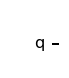

In [3]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)
circuit.draw('mpl')

Then initialize the state to $\vert0\rangle$


In [4]:
from qiskit.quantum_info import Statevector

qubit = Statevector.from_label('0')

Then apply the Hadamard gate

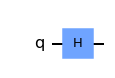

In [5]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.draw('mpl')

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


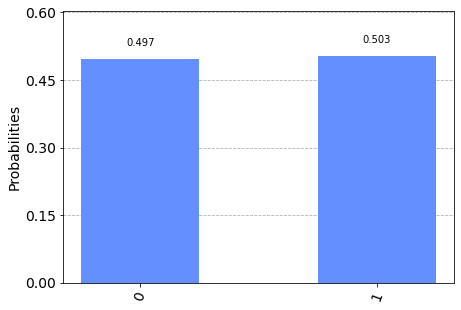

In [6]:
final_qubit = qubit.evolve(circuit)
print(final_qubit)


counts = final_qubit.sample_counts(shots=1000)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

# 1. EXAMPLE WITH ALTERNATIVE INITIALIZATION

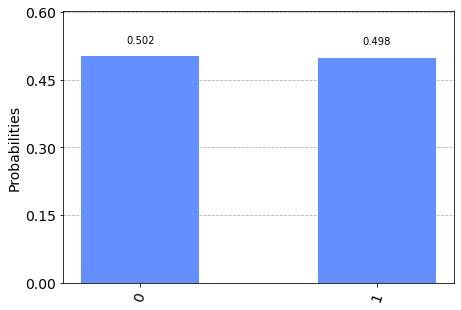

In [7]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize

qc = QuantumCircuit(1, 1)
# with this syntax, qubits are implicitly initialized to |0>
qc.h(0)
qc.measure(0,0)

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

# 1.EXERCISE

### Let's replicate the previous example... but see what happens when we start from state $|1\rangle$

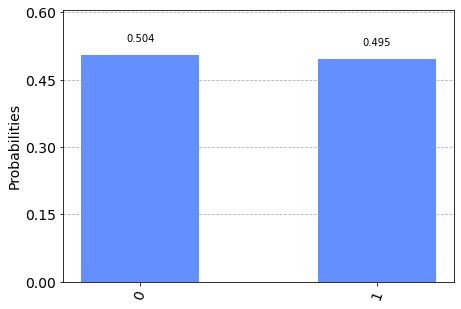

In [12]:
### WRITE YOUR CODE 
qc = QuantumCircuit(1, 1)
# with this syntax, qubits are implicitly initialized to |0>
qc.x(0)
qc.h(0)
qc.measure(0,0)

simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=10000).result()
counts = result.get_counts(qc)
plot_histogram(counts)

# 2.EXAMPLE - MultiQubit, Entanglement and Bell States

### Multiqubit

A multiqubit state is a state of 2 or more qubits.
With n qubits, it can be a superposition of $2^n$ different states.

Example:
two bits have four possible states:

`00` `01` `10` `11`

the state of two qubits is a linear combination of 4 different states. We store these amplitudes in a 4D-vector like so:

$$ |q_1q_2\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$


In [ ]:
sv = Statevector.from_label('00')

In [ ]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2) # two qubit Quantum Circuit
circuit.draw('mpl')

### CNOT Gate - a multiqubit gate

The CNOT gate can be used to entangle two qubits. This gate flips the target qubit if and only if the control qubit is in state $\vert1\rangle$

The way it works is similar to a Classical XOR GATE.
\
 We can use the classical truth table:

| Input (t,c) | Output (t,c) |
|:-----------:|:------------:|
| 00          | 00           |
| 01          | 11           |
| 10          | 10           |
| 11          | 01           |

Let's apply CNOT GATE to our system: $|q_1q_2\rangle$ 

A brief mathematical glimpse of what happens when we apply a CNOT GATE.

The unitary matrix is a 4x4:


$$
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix}
$$

This matrix swaps the amplitudes of $|01\rangle$ and $|11\rangle$ in our statevector:

$$ 
|a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

In [ ]:
## Apply the CNOT gate to q0 (control) and use as target qubit q1
circuit.cx(0,1)
circuit.draw('mpl')

Physically speaking the CNOT gate allows us to entangle our two qubits

### Bell States

The Bell states are specific quantum states of two qubits that represent the simplest examples of quantum entanglement. We can create a bell state by using the following approach:

In [ ]:
circuit = QuantumCircuit(2)
# Apply H-gate to the first:
circuit.h(0)
# Apply a CNOT:
circuit.cx(0,1)
circuit.draw('mpl')

# 2.EXERCISE - Bell States, and 2 qubit Gates

### Create a quantum circuit that produces the Bell state: $\tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

Hint: reproduce the circuit drawn above, but initialize the system to $|11\rangle$


In [ ]:
### WRITE QUANTUM CIRCUIT
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize

# qc = ...